In [3]:
# !python utilities/build_ltr.py --lookup_query "canon rebel" --all_clicks /workspace/datasets/train.csv | less

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("/workspace/datasets/train.csv")

In [6]:
df

,user,sku,category,query,click_time,query_time
0,000000df17cd56a5df4a94074e133c9d4739fae3,2125233,abcat0101001,Televisiones Panasonic 50 pulgadas,2011-09-01 23:44:52.533,2011-09-01 23:43:59.752
1,000001928162247ffaf63185cd8b2a244c78e7c6,2009324,abcat0101001,Sharp,2011-09-05 12:25:37.42,2011-09-05 12:25:01.187
2,000017f79c2b5da56721f22f9fdd726b13daf8e8,1517163,pcmcat193100050014,nook,2011-08-24 12:56:58.91,2011-08-24 12:55:13.012
3,000017f79c2b5da56721f22f9fdd726b13daf8e8,2877125,abcat0101001,rca,2011-10-25 07:18:14.722,2011-10-25 07:16:51.759
4,000017f79c2b5da56721f22f9fdd726b13daf8e8,2877134,abcat0101005,rca,2011-10-25 07:19:51.697,2011-10-25 07:16:51.759
...,...,...,...,...,...,...
1865264,ffffbcfcee8ff636231fa0df557528e6fa2ecdba,3674224,pcmcat247400050000,ttv,2011-10-28 07:30:33.921,2011-10-28 07:27:05.039
1865265,ffffddbbdc67c4d775c7232082adaf40c7e7d03c,2986037,pcmcat218000050000,incase,2011-09-11 14:18:12.625,2011-09-11 14:17:57.759
1865266,ffffed824a4fc5b78e407a423f72bbbc2f6e5213,3303069,pcmcat248500050020,ds games,2011-10-20 00:24:18.609,2011-10-20 00:23:16.705
1865267,fffff158dec2f40d082f7797413f7b6dbc1713e6,2390524,pcmcat209000050008,Archos,2011-10-30 15:42:02.347,2011-10-30 15:40:20.889


In [10]:
gb = df.groupby("query")

In [11]:
gb.get_group("ipad").count()

user          5036
sku           5036
category      5036
query         5036
click_time    5036
query_time    5036
dtype: int64

In [14]:
lte2 = gb.size().sort_values() < 2
lte2

query
!pod                                        True
Wireless Kit                                True
Wireless LAN adapters                       True
Wireless LAN adaptor                        True
Wireless Microphone                         True
                                           ...  
hp touchpad                                False
iPad                                       False
Hp touchpad                                False
2622037 2127204 2127213 2121716 2138291    False
lcd tv                                     False
Length: 257860, dtype: bool

In [23]:
feature_results = []
for i in range(5):
    feature_result = {}
    feature_result["doc_id"] = 1
    feature_result["query_id"] = 34
    feature_result["sku"] = 2343
    feature_result["salePrice"] = 234
    feature_results += [feature_result]

feature_results[0]["name_match"] = "sdf"

In [24]:
frame = pd.DataFrame(feature_results)
frame.astype({'doc_id': 'int64', 'query_id': 'int64', 'sku': 'int64'})

,doc_id,query_id,sku,salePrice,name_match
0,1,34,2343,234,sdf
1,1,34,2343,234,NaN
2,1,34,2343,234,NaN
3,1,34,2343,234,NaN
4,1,34,2343,234,NaN


In [48]:
txgb= pd.read_csv("/workspace/ltr_output/training.xgb", sep='\t', header=None)
txgb

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.00,qid:2759,1:0.0000,2:0.0000,3:169.9900,4:199.9900,5:4547.0000,6:4204.0000,7:5136.0000 # 9317768,1.0,pvr,fake
1,0.00,qid:2285,1:10.6966,2:0.0000,3:40.9900,4:40.9900,5:1000000.0000,6:1000000.0000,7:1000000.0000 # 2614056,7.0,iPhone 4 case,fake
2,0.00,qid:2544,1:10.1487,2:10.1487,3:49.9900,4:49.9900,5:984.0000,6:655.0000,7:647.0000 # 3219089,8.0,modem,fake
3,0.00,qid:2741,1:0.0000,2:0.0000,3:0.0000,4:0.0000,5:0.0000,6:0.0000,7:0.0000 # 9172799,9.0,ps3,fake
4,0.00,qid:809,1:0.0000,2:0.0000,3:0.0000,4:0.0000,5:0.0000,6:0.0000,7:0.0000 # 2670819,15.0,Laptop,fake
...,...,...,...,...,...,...,...,...,...,...,...,...
8756,0.00,qid:2264,1:4.9640,2:4.9640,3:34.9900,4:34.9900,5:32594.0000,6:41119.0000,7:51518.0000 # 2330145,22.0,iPad,fake
8757,0.00,qid:229,1:9.0952,2:9.0952,3:29.9900,4:29.9900,5:1000000.0000,6:1000000.0000,7:1000000.0000 # 2022316,12.0,Bluetooth,fake
8758,1.00,qid:2700,1:10.5450,2:10.5450,3:249.9900,4:249.9900,5:269.0000,6:179.0000,7:110.0000 # 3061302,1.0,playstation 3,fake
8759,0.75,qid:1159,1:6.2690,2:0.0000,3:159.9900,4:159.9900,5:1000000.0000,6:1000000.0000,7:106812.0000 # 3196078,2.0,Psp 3000,fake


In [49]:
txgb[0].value_counts()

0.75    2891
0.00    2215
1.00    2021
0.50    1634
Name: 0, dtype: int64

In [50]:
simple_better = pd.read_csv("/workspace/ltr_output/analysis/simple_better.csv")
simple_better[(simple_better.rank_simple <= 10) & (simple_better.rank_ltr > 10)]

,query,sku,rank_simple,type_simple,found_simple,new_simple,score_simple,rank_ltr,type_ltr,found_ltr,new_ltr,score_ltr
28,king of queens,8184822,8,simple,True,True,856.535340,13,ltr_simple,True,True,857.742400
31,external harddrives,1758088,8,simple,True,True,2.045089,11,ltr_simple,True,True,3.216589
670,Play station 3,1229028,5,simple,True,True,1002.922900,12,ltr_simple,True,True,1004.146600


In [51]:
exp = pd.read_csv("/workspace/ltr_output/analysis/simple_ltr_explains.csv")
exp

,query,sku,score,clause_0,Feature 0(name_match),Feature 1(name_phrase_match),Feature 2(name_hyphens_min_df),Feature 3(salePrice),Feature 4(regularPrice),Feature 5(salesRankShortTerm),Feature 6(salesRankMediumTerm),Feature 7(salesRankLongTerm),clause_1,clause_2,clause_3,clause_4,clause_5,clause_6
0,hdtv,8939839,411.154700,0.388534,6.297706,6.297706,2556.0,29.99,29.99,167.0,137.0,209.0,0.062977,67.328384,343.374800,0.00000,0,0
1,hdtv,2127443,322.421700,0.398767,5.429196,5.429196,2556.0,429.99,429.99,84379.0,50453.0,65471.0,1.000000,0.054292,54.291960,266.67667,0,0
2,hdtv,2120195,322.421700,0.398767,5.429196,5.429196,2556.0,699.99,699.99,84339.0,50437.0,77179.0,1.000000,0.054292,54.291960,266.67667,0,0
3,hdtv,2135081,321.421700,0.398767,5.429196,5.429196,2556.0,799.99,799.99,1000000.0,102543.0,58600.0,0.054292,54.291960,266.676670,0.00000,0,0
4,hdtv,2138282,321.421700,0.398767,5.429196,5.429196,2556.0,999.99,999.99,1000000.0,1000000.0,68604.0,0.054292,54.291960,266.676670,0.00000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Kindle,3216774,351.818150,293.736200,5.681857,5.681857,201.0,29.99,29.99,1000000.0,1000000.0,230567.0,0.437893,0.048710,57.595320,0.00000,0,0
95,Kindle,3216595,351.818150,293.736200,5.681857,5.681857,201.0,22.98,24.99,1000000.0,1000000.0,129096.0,0.437893,0.048710,57.595320,0.00000,0,0
96,Kindle,3216577,338.120500,281.450000,5.404724,5.404724,201.0,29.99,29.99,1000000.0,1000000.0,230565.0,0.437893,1.000000,0.046335,55.18628,0,0
97,Kindle,1945674,1.440099,0.440099,0.000000,0.000000,201.0,499.99,599.99,9305.0,4686.0,7906.0,1.000000,0.000000,0.000000,0.00000,0,0


In [52]:
!ls /workspace/ltr_output

analysis		  training.xgb
features.csv		  training.xgb.csv
impressions.csv		  validity.csv
ltr_model_importance.png  xgb-feat-map.txt
ltr_model_tree.png	  xgb_model.model
meta.txt		  xgb_model.model.ltr
query_to_query_ids.json   xgb_test_output.csv
test.csv		  xgb_test_output.csv.new_queries
train.csv		  xgb_test_output.csv.no_results


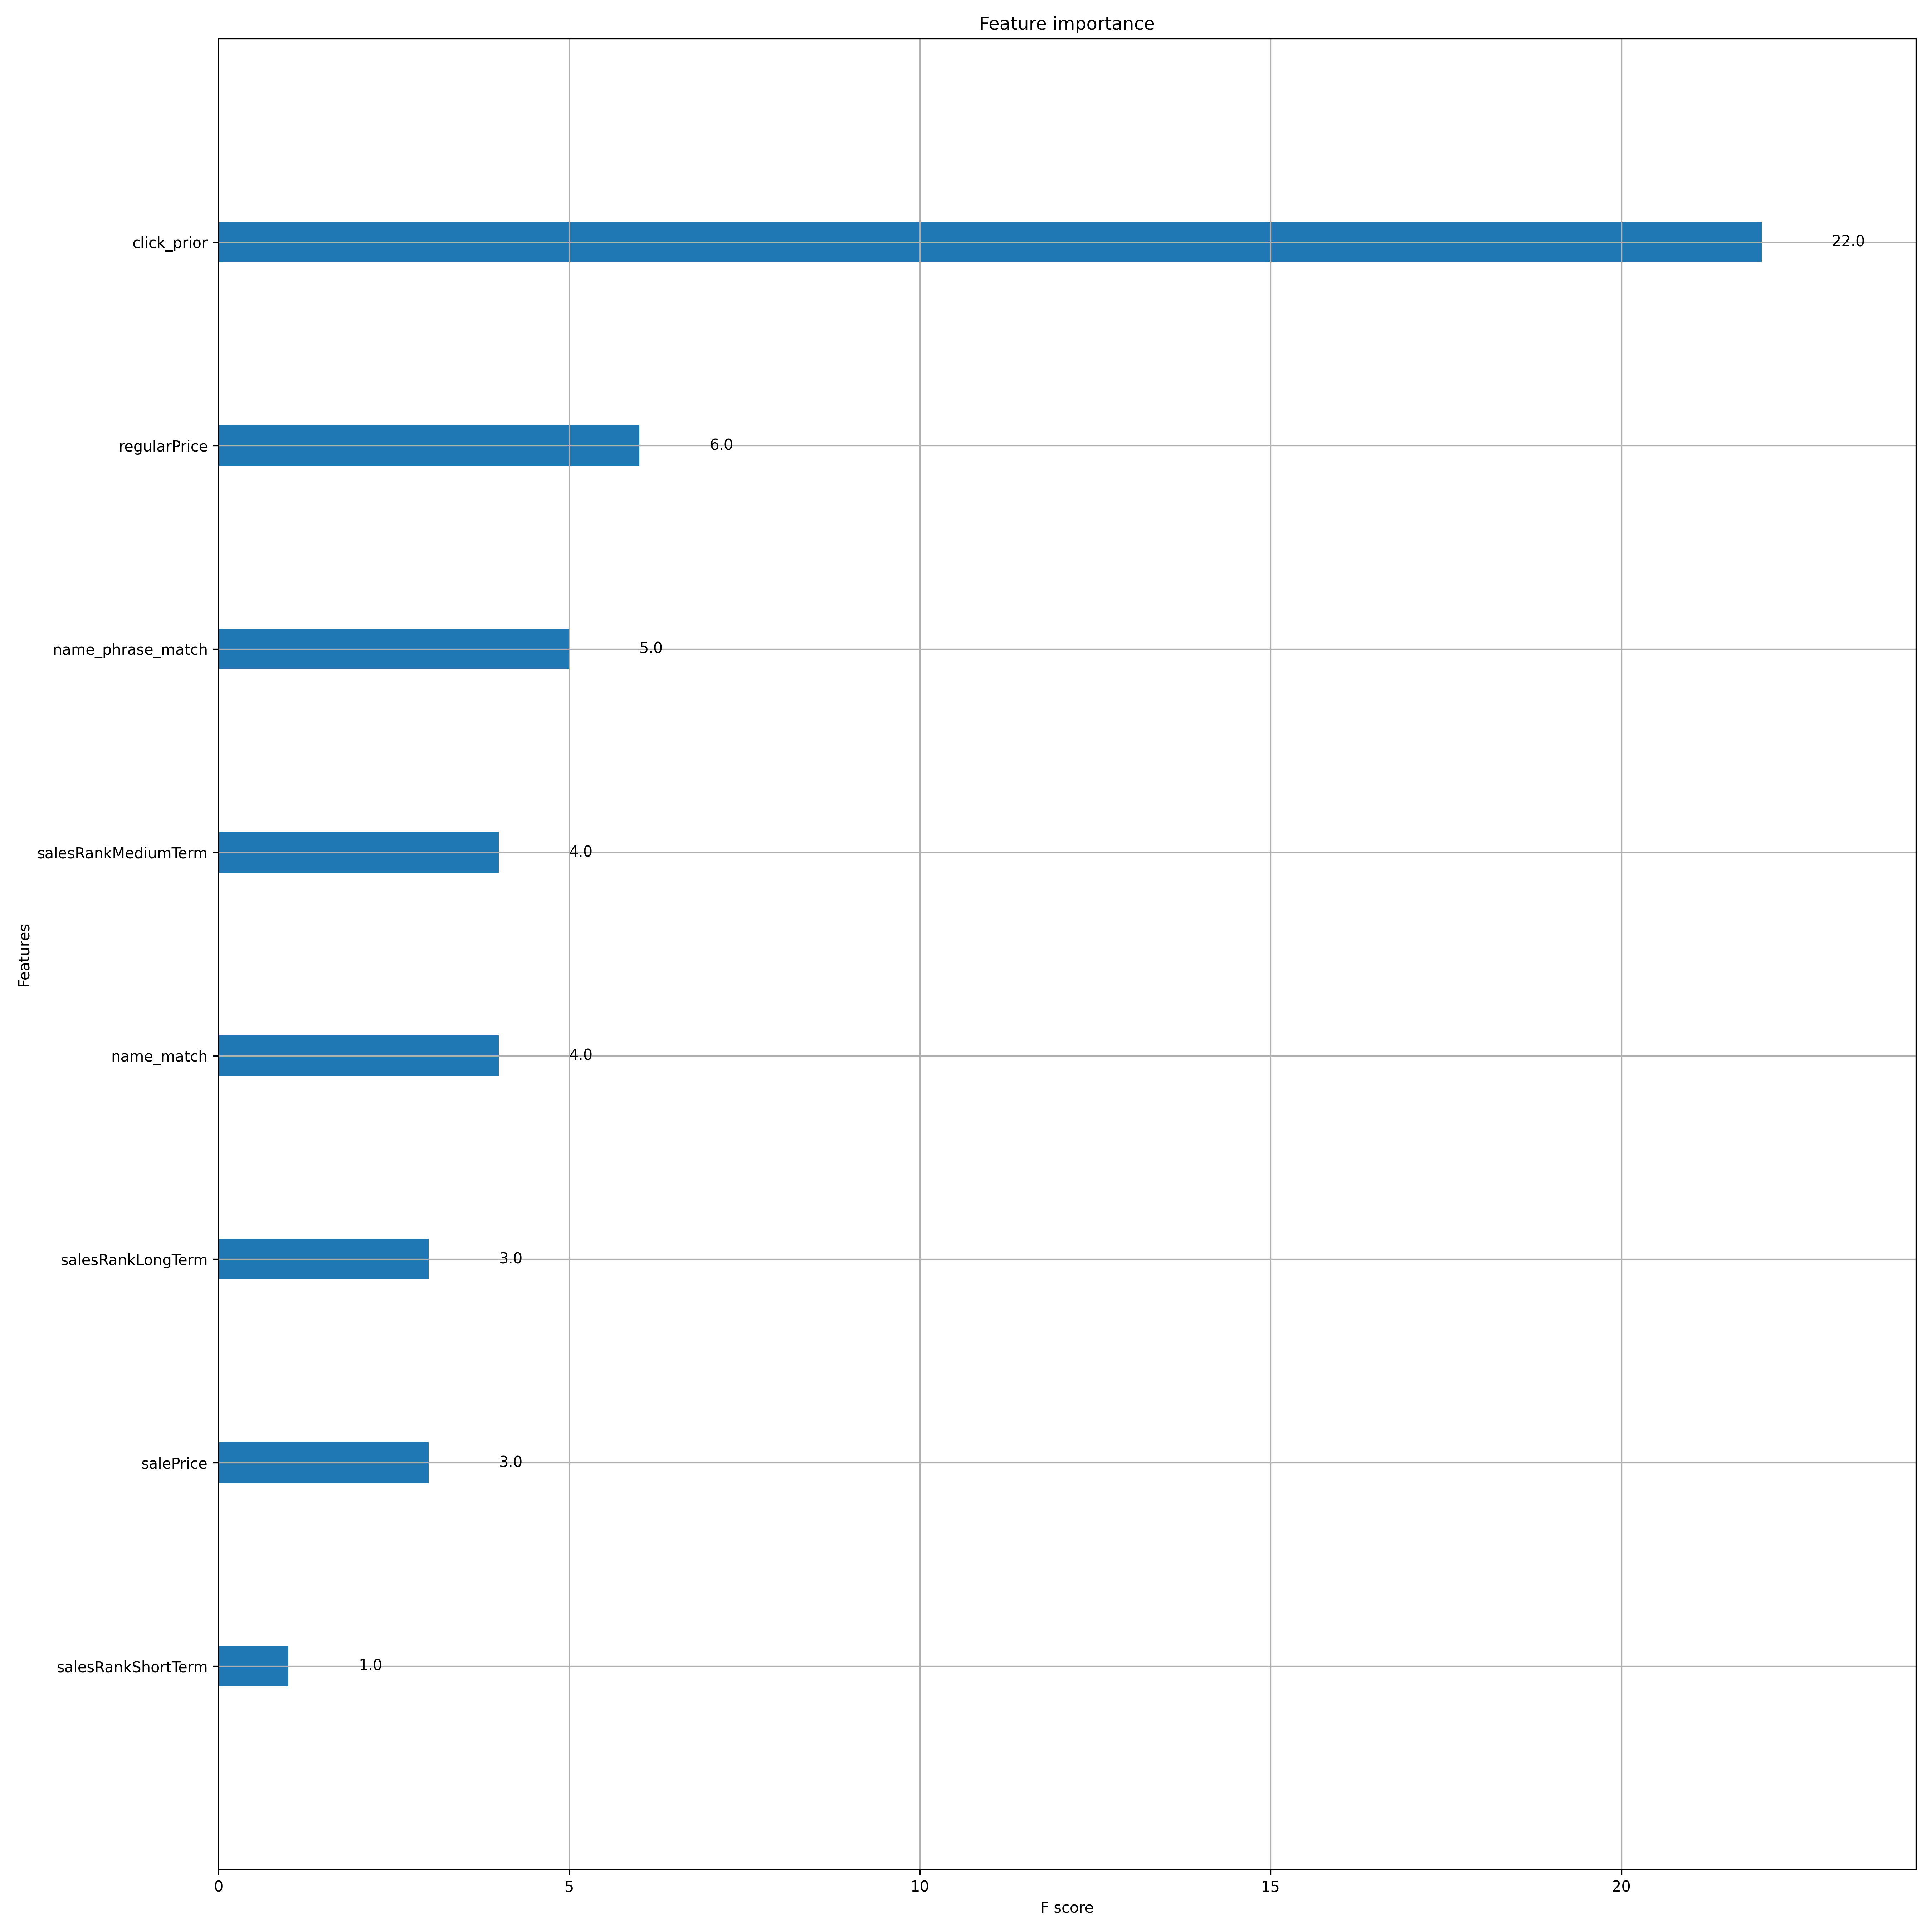

In [54]:
from IPython.display import Image, display
display(Image(filename='/workspace/ltr_output/ltr_model_importance.png'))